<a href="https://colab.research.google.com/github/thangthao22/python-training/blob/main/B%C3%A0i_gi%E1%BA%A3ng_4_GRADIENT_METHOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

BÀI TẬP PHẦN 4 GRADIENT METHOD

Saving Assignment_MLBasicsData.csv to Assignment_MLBasicsData (2).csv
First data point:
Latitude                        69.04277
Longitude                       20.85091
Timestamp            2023-12-31 18:00:00
temp                               -16.5
name         Enontekiö Kilpisjärvi Saana
Name: 0, dtype: object

******************************

Another data point:
Latitude                     69.757
Longitude                    27.012
Timestamp       2023-12-31 13:00:00
temp                          -26.3
name         Utsjoki Kevo Kevojärvi
Name: 13, dtype: object

******************************

Unnormalized features of the first data point: 
Latitude: 69.04277
Longitude: 20.85091
Year: 2023.0
Month: 12.0
Day: 31.0
Hour: 18.0
Minute: 0.0

******************************

Label of first data point: -16.5
The created feature matrix contains 19768 entries of 7 features each.
The created label vector contains 19768 measurements.
The training set consists of 100 data points.
The validatio

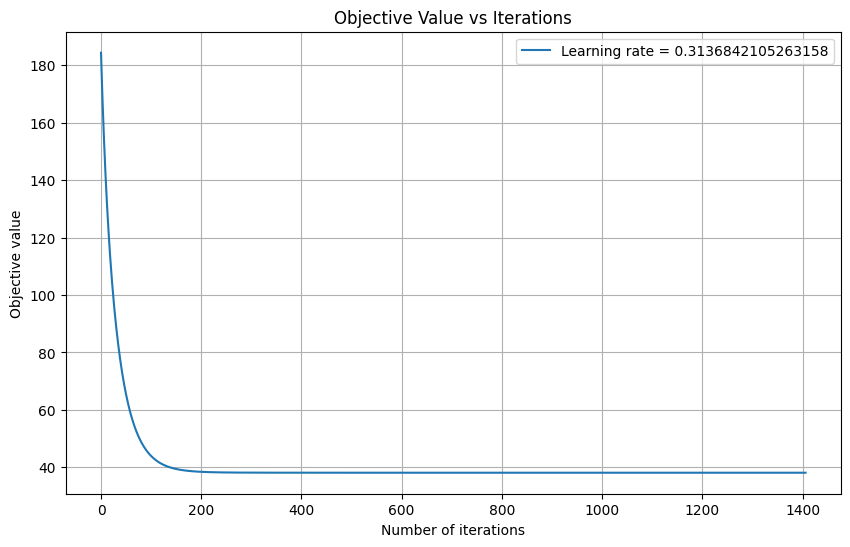

In [ ]:
# Cell 1: Markdown - Tiêu đề
"""
# Coding Assignment "Gradient Methods"
"""

# Cell 2: Markdown - Chuẩn bị
"""
## 1. Preparation
"""

# Cell 3: Code - Nhập thư viện
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from numpy import linalg as LA
from google.colab import files

# Cell 4: Markdown - Dữ liệu
"""
## 2. Data
"""

# Cell 5: Markdown - Dataset
"""
### 2.1 Dataset
"""

# Cell 6: Code - Tải và đọc dữ liệu
uploaded = files.upload()
data = pd.read_csv(list(uploaded.keys())[0])

nrdatapoints = len(data)

print("First data point:")
print(data.iloc[0])
print("\n******************************\n")

print("Another data point:")
print(data.iloc[13])
print("\n******************************\n")

nrfeatures = 7

date_object = datetime.strptime(data['Timestamp'].iloc[0], '%Y-%m-%d %H:%M:%S')
latitude = data["Latitude"].iloc[0]
longitude = data["Longitude"].iloc[0]
year = float(date_object.year)
month = float(date_object.month)
day = float(date_object.day)
hour = float(date_object.hour)
minute = float(date_object.minute)

print("Unnormalized features of the first data point: ")
print(f"Latitude: {latitude}")
print(f"Longitude: {longitude}")
print(f"Year: {year}")
print(f"Month: {month}")
print(f"Day: {day}")
print(f"Hour: {hour}")
print(f"Minute: {minute}")
print("\n******************************\n")

print("Label of first data point:", data["temp"].iloc[0])

# Cell 7: Markdown - Đặc trưng và nhãn
"""
### 2.2 Features and Labels
"""

# Cell 8: Code - Xây dựng ma trận đặc trưng và vector nhãn
X = np.zeros((nrdatapoints, nrfeatures))
y = np.zeros(nrdatapoints)  # Sử dụng mảng 1D thay vì 2D để tránh lỗi broadcast

for ind in data.index:
    lat = float(data['Latitude'].iloc[ind]) / 100
    lon = float(data['Longitude'].iloc[ind]) / 100
    tmp = data['temp'].iloc[ind]
    date_object = datetime.strptime(data['Timestamp'].iloc[ind], '%Y-%m-%d %H:%M:%S')
    year = float(date_object.year) / 2025
    month = float(date_object.month) / 13
    day = float(date_object.day) / 32
    hour = float(date_object.hour) / 25
    minute = float(date_object

.minute) / 61
    X[ind, :] = [lat, lon, year, month, day, hour, minute]
    y[ind] = tmp  # Gán trực tiếp vào mảng 1D

print(f"The created feature matrix contains {np.shape(X)[0]} entries of {np.shape(X)[1]} features each.")
print(f"The created label vector contains {np.shape(y)[0]} measurements.")

# Cell 9: Markdown - Tập huấn luyện và xác nhận
"""
### 2.3 Training and Validation Sets
"""

# Cell 10: Code - Chia dữ liệu
trainsize = 100
Xtrain = X[:trainsize, :]
Xval = X[trainsize:, :]
ytrain = y[:trainsize]
yval = y[trainsize:]

print(f"The training set consists of {np.shape(Xtrain)[0]} data points.")
print(f"The validation set consists of {np.shape(Xval)[0]} data points.")

# Cell 11: Markdown - Mô hình
"""
## 3. Model
"""

# Cell 12: Markdown - Hồi quy Ridge bằng Scikit-learn
"""
### 3.1 Ridge Regression - Ready made implementation via Scikit-learn class
"""

# Cell 13: Code - Hồi quy Ridge bằng Scikit-learn
regparam = 0.01
ridge = Ridge(alpha=(trainsize * regparam), fit_intercept=False)
ridge.fit(Xtrain, ytrain)
Etrain = mean_squared_error(ytrain, ridge.predict(Xtrain))
Eval = mean_squared_error(yval, ridge.predict(Xval))

print("********** Ridge Regression Diagnosis **********")
print("Training error: ", Etrain)
print("Validation error: ", Eval)

# Cell 14: Markdown - Nhiệm vụ 1 của sinh viên
"""
### 3.2 Student Task #1 - Ridge Regression by Gradient Descent
"""

# Cell 15: Code - Nhiệm vụ 1: Gradient Descent
N_iters = 1000
lrate = 0.1

def compute_gradient(X, y, w, alpha, m):
    predictions = X.dot(w)
    errors = y - predictions
    gradient = -2/m * X.T.dot(errors) + 2 * alpha * w
    return gradient

def gradient_descent(X, y, alpha, eta, max_iters):
    m, d = X.shape
    w = np.zeros(d)
    for k in range(max_iters):
        grad = compute_gradient(X, y, w, alpha, m)
        w = w - eta * grad
    return w

w_gd = gradient_descent(Xtrain, ytrain, regparam, lrate, N_iters)

ytrain_pred = Xtrain.dot(w_gd)
yval_pred = Xval.dot(w_gd)
Etrain_gd = mean_squared_error(ytrain, ytrain_pred)
Eval_gd = mean_squared_error(yval, yval_pred)

print("********** GD Ridge Regression Diagnosis **********")
print("Training error: ", Etrain_gd)
print("Validation error: ", Eval_gd)

# Cell 16: Markdown - Nhiệm vụ 2 của sinh viên
"""
### 3.3 Student Task #2 - The Optimal Learning Rate
"""

# Cell 17: Code - Nhiệm vụ 2: Tìm tốc độ học tối ưu
lrates = np.linspace(0.28, 0.32, 20)
tolerance = 1e-10

def compute_objective(X, y, w, alpha, m):
    predictions = X.dot(w)
    loss = (1/m) * np.sum((y - predictions)**2) + alpha * np.sum(w**2)
    return loss

def gradient_descent_with_tolerance(X, y, alpha, eta, tolerance):
    m, d = X.shape
    w = np.zeros(d)
    objective_history = []
    k = 0
    while True:
        grad = compute_gradient(X, y, w, alpha, m)
        w_new = w - eta * grad
        obj = compute_objective(X, y, w, alpha, m)
        obj_new = compute_objective(X, y, w_new, alpha, m)
        objective_history.append(obj_new)
        if k > 0 and abs(obj - obj_new) < tolerance:
            break
        w = w_new
        k += 1
        if k > 10000:  # Ngăn vòng lặp vô hạn
            break
    return w, k, objective_history[-1]

best_lrate = None
min_iters = float('inf')
best_w = None
best_obj = None
best_Etrain = None
best_Eval = None

for lrate in lrates:
    w_gd, iters, obj = gradient_descent_with_tolerance(Xtrain, ytrain, regparam, lrate, tolerance)
    print(f"The learning rate: {lrate}")
    print(f"The number of iterations: {iters}")
    print(f"The objective value: {obj}\n")

    if iters < min_iters:
        min_iters = iters
        best_lrate = lrate
        best_w = w_gd
        best_obj = obj

ytrain_pred = Xtrain.dot(best_w)
yval_pred = Xval.dot(best_w)
best_Etrain = mean_squared_error(ytrain, ytrain_pred)
best_Eval = mean_squared_error(yval, yval_pred)

print("********** GD Ridge Regression Diagnosis **********")
print("The optimal hyperparameters:")
print(f"The learning rate: {best_lrate}")
print(f"The tolerance: {tolerance}")
print(f"The objective value: {best_obj}\n")
print("Training error: ", best_Etrain)
print("Validation error: ", best_Eval)

# Cell 18: Code - Vẽ đồ thị hội tụ
w_gd, iters, obj = gradient_descent_with_tolerance(Xtrain, ytrain, regparam, best_lrate, tolerance)
objective_history = []
w = np.zeros(Xtrain.shape[1])
for k in range(iters + 1):
    grad = compute_gradient(Xtrain, ytrain, w, regparam, Xtrain.shape[0])
    w = w - best_lrate * grad
    obj = compute_objective(Xtrain, ytrain, w, regparam, Xtrain.shape[0])
    objective_history.append(obj)

plt.figure(figsize=(10, 6))
plt.plot(range(iters + 1), objective_history, label=f'Learning rate = {best_lrate}')
plt.xlabel('Number of iterations')
plt.ylabel('Objective value')
plt.title('Objective Value vs Iterations')
plt.legend()
plt.grid(True)
plt.show()